# Aufgabe 1:

Schreiben Sie ein Python Programm, das einhundert 2-Tupel anlegt,
deren Attributwerte jeweils zwischen 1 und 10 zufällig zu wählen sind.
Tupel, deren Attributsumme zwischen 9 und 13 (jeweils inklusive)
liegen, sollen der Klasse A zugeordnet werden, alle anderen Tupel
gehören zur Klasse B.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random

tupel = [tuple((random.randint(1, 10),random.randint(1,10))) for i in range(100)]

Klasse_A = []
Klasse_B = []

for i in tupel:
    if i[0] + i[1] < 9 or i[0] + i[1] > 13:
        Klasse_B.append(i)
    else:
        Klasse_A.append(i)


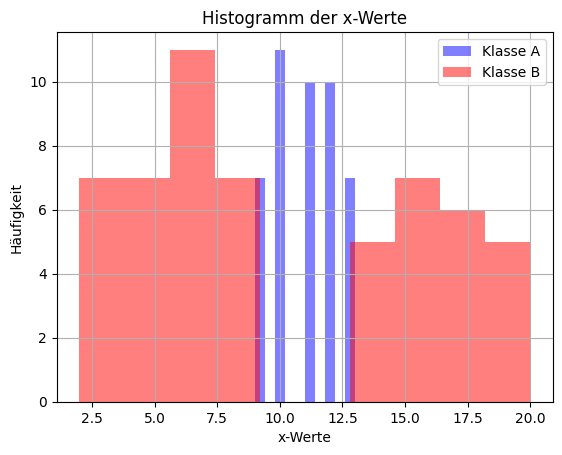

In [25]:
plt.hist([i[0]+i[1] for i in Klasse_A], bins=10, alpha=0.5, color='blue', label='Klasse A')
plt.hist([i[0]+i[1] for i in Klasse_B], bins=10, alpha=0.5, color='red', label='Klasse B')
plt.title('Histogramm der x-Werte')
plt.xlabel('x-Werte')
plt.ylabel('Häufigkeit')
plt.legend()
plt.grid()
plt.show()


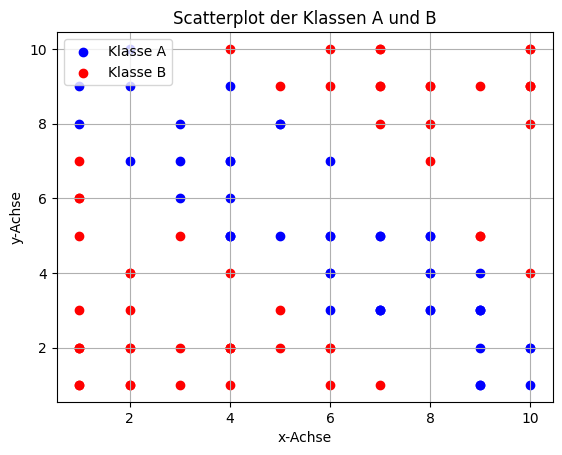

In [64]:
#b scatterplot
plt.scatter(*zip(*Klasse_A), color='blue', label='Klasse A')
plt.scatter(*zip(*Klasse_B), color='red', label='Klasse B')
plt.title('Scatterplot der Klassen A und B')
plt.xlabel('x-Achse')
plt.ylabel('y-Achse')
plt.legend()
plt.grid()
plt.show()

[(2, 1), (5, 4), (4, 3), (2, 9), (2, 10), (7, 1), (1, 2), (4, 4), (9, 10), (1, 9), (4, 9), (7, 4), (8, 10), (5, 1), (3, 7), (6, 5), (3, 4), (6, 2), (2, 7), (2, 6), (6, 10), (5, 1), (8, 9), (2, 7), (2, 9), (5, 10), (6, 10), (4, 2), (1, 4), (5, 2), (4, 2), (7, 5), (8, 6), (3, 6), (6, 4), (5, 2), (10, 3), (9, 4), (3, 8), (7, 5), (9, 4), (6, 1), (4, 1), (6, 7), (5, 2), (4, 10), (6, 4), (8, 7), (8, 3), (5, 3), (4, 9), (9, 5), (10, 7), (10, 7), (6, 4), (3, 9), (8, 2), (1, 2), (3, 3), (7, 10), (2, 7), (7, 10), (8, 9), (5, 9), (1, 2), (9, 5), (6, 2), (5, 7), (3, 8), (1, 5), (9, 3), (9, 2), (5, 9), (10, 4), (3, 6), (3, 9), (9, 1), (10, 6), (8, 1), (2, 6), (5, 4), (1, 4), (10, 2), (2, 8), (2, 9), (3, 3), (8, 9), (3, 5), (9, 10), (7, 4), (9, 4), (5, 7), (6, 8), (9, 8), (2, 4), (4, 2), (6, 1), (10, 9), (4, 10), (4, 1)]
Trainingsdaten:  [(7, 10), (10, 3), (5, 7), (9, 4), (4, 10), (10, 7), (6, 4), (2, 7), (8, 3), (5, 10), (5, 3), (5, 1), (3, 5), (6, 5), (10, 4), (3, 9), (9, 10), (5, 4), (3, 6), (8, 

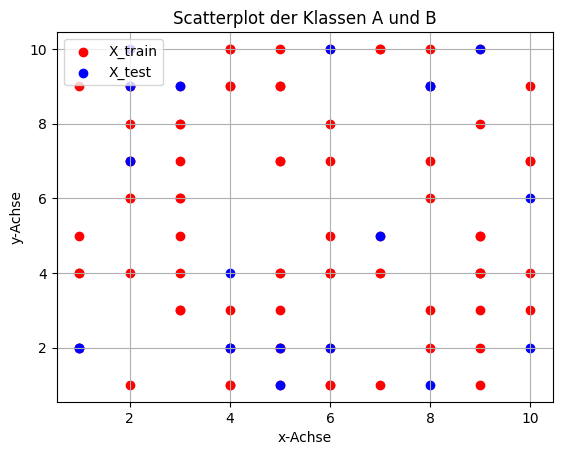

In [59]:
#c
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)
tupel = [tuple((random.randint(1, 10),random.randint(1,10))) for i in range(100)]

Klasse = []

for i in tupel:
    if i[0] + i[1] < 9 or i[0] + i[1] > 13:
        Klasse.append('A')
    else:
        Klasse.append('B')

print(tupel)
X_train, X_test, y_train, y_test = train_test_split(tupel, Klasse , test_size=0.2, train_size=0.8, random_state=None, shuffle=True, stratify=None)

print("Trainingsdaten: ", X_train)
print("Trainingslabels: ", y_train)
print("Testdaten: ", X_test)
print("Testlabels: ", y_test)


plt.scatter(*zip(*X_train), color='red', label='X_train')

plt.scatter(*zip(*X_test), color='blue', label='X_test')

plt.title('Scatterplot der Klassen A und B')
plt.xlabel('x-Achse')
plt.ylabel('y-Achse')
plt.legend()
plt.grid()
plt.show()


# Aufgabe 2:
Wenden Sie auf Ihre Daten aus Aufgabe 1 den K-Nearest-NeighborAlgorithmus an: sklearn.neighbors.KNeighborsClassifier
Hierbei sind nacheinander 1, 3, 5 und 7 Nachbarn zu wählen!
Das Modell ist jeweils mittels fit auf X_train anzupassen, die
Klassifikation findet mittels predict auf X_test statt.
Geben Sie mit sklearn.metrics.confusion_matrix jeweils die
Konfusionsmatrix Ihrer Lösung an!

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

for i in [1, 3 , 5 , 7]:
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    print(f"Vorhersage mit {i} Neighbours: ", y_pred)

    matrix = confusion_matrix(y_test, y_pred)
    print(f"Konfusionsmatrix mit {i} Neighbours: \n", matrix)

Vorhersage mit 1 Neighbours:  ['A' 'A' 'B' 'A' 'A' 'A' 'B' 'B' 'B' 'A' 'B' 'B' 'A' 'A' 'A' 'A' 'A' 'A'
 'B' 'A']
Konfusionsmatrix mit 1 Neighbours: 
 [[12  1]
 [ 1  6]]
Vorhersage mit 3 Neighbours:  ['A' 'A' 'B' 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A'
 'B' 'A']
Konfusionsmatrix mit 3 Neighbours: 
 [[13  0]
 [ 0  7]]
Vorhersage mit 5 Neighbours:  ['A' 'A' 'B' 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A'
 'B' 'A']
Konfusionsmatrix mit 5 Neighbours: 
 [[13  0]
 [ 0  7]]
Vorhersage mit 7 Neighbours:  ['A' 'A' 'B' 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A'
 'B' 'A']
Konfusionsmatrix mit 7 Neighbours: 
 [[13  0]
 [ 0  7]]


# Aufgabe 3:
Freiwillige Zusatzaufgabe (siehe Hinweis ganz unten)!
Visualisieren Sie Ihre Ergebnisse aus Aufgabe 2 mittels
matplotlib.pyplot.scatter!

# Aufgabe 4:
Visualisieren Sie Daten aus einem der „Spieldatensätze“ von sk-learn
(eigener Wahl) analog zur Iris-Datenbank aus der Vorlesung!

In [72]:
from sklearn import datasets

wine = datasets.load_wine()
X = wine.data
y = wine.target
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

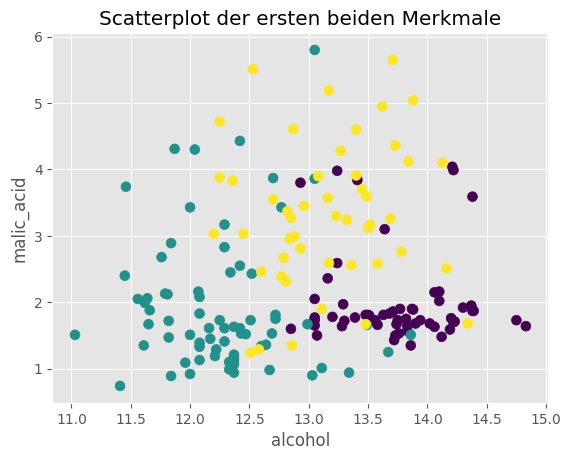

In [76]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
ax = plt.axes()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
ax.set_xlabel(wine.feature_names[0])
ax.set_ylabel(wine.feature_names[1])
plt.title('Scatterplot der ersten beiden Merkmale')
plt.show()

# Aufgabe 5: Wissensfragen
- Was heißt Overfitting? Was bedeutet Underfitting? Erläutern Sie
die Begriffe anhand eines eigenen, einfachen Beispiels!
    - Overfitting tritt dann auf wenn zu viele Merkmale trainiert werden oder wenn zu viele ähnliche
      Daten zum trainieren verwendet wird
    - Underfitting ist wenn zu wenige oder zu wenig verschiedene Daten verwendet

- Untersuchen Sie die MNIST Datenbank! Wie werden die handschriftlichen Ziffern repräsentiert?
    - als Array von Pixelwerten des Bildes

- Was ist die Grundidee der linearen Regression?
    - Bestimmung einer Geraden, die den Zusammenhang zwischen Eingabe- und Zielvariablen durch  Minimierung der Fehler (meist quadratisch) beschreibt.

- Warum wird eine zufällige Verteilung von Trainingsdaten ausgeschlossen?
    - durch die rein zufällige Verteilung der Trainingsdaten kann es zu Problemen mit der Repräsentation der Daten kommen, weshalb man schon darauf achten soll dass alle Merkmale und Klassen gleichmäßig eingebunden werden

- Worin besteht der Unterschied zwischen der gewichteten und der ungewichteten Minkowsky-Norm?
    - nur dass die einzelnen Merkmale gewichtet werden, um deren Einfluss auf die Distanzberechnung zu steuern

- Welchen Einfluss besitzt die Anzahl der Nachbarn im k-NearestNeighbor-Algorithmus auf das Ergebnis?
    - bei kleinen K-Werten ist die Entscheidungsgrenze sehr sensibel gegenüber Außreißern und Rauschen 
    - bei größeren K-Werten ist die Entscheidungsgrenze viel smoother, kann aber zu größeren Fehlerbereichen führen 

- Erläutern Sie die Grundidee des CBR!
    - CBR ist ein Verfahren der künstlichen Intelligenz, bei dem neue Probleme durch den Rückgriff auf bereits gelöste, ähnliche Probleme gelöst werden.


        - Retrieve: Ähnlichsten Fall in der Fallbasis finden

        - Reuse: Lösung des alten Falls auf das neue Problem anwenden

        - Revise: Lösung ggf. anpassen/verbessern

        - Retain: Neues Wissen/Fall abspeichern

